In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'spam.csv'
spam_df = pd.read_csv(file_path, encoding='latin1')

In [3]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
count_vector.fit(simple_train)

CountVectorizer()

In [6]:
count_vector.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [7]:
simple_train_tr = count_vector.transform(simple_train)
simple_train_tr = simple_train_tr.toarray()
df_simple = pd.DataFrame(simple_train_tr, columns=count_vector.get_feature_names_out())

In [8]:
simple_train = pd.Series(simple_train, name='Text')
simple_train

0             call you tonight
1                Call me a cab
2    Please call me... PLEASE!
Name: Text, dtype: object

In [9]:
df = pd.concat([simple_train, df_simple], axis=1)
df

,Text,cab,call,me,please,tonight,you
0,call you tonight,0,1,0,0,1,1
1,Call me a cab,1,1,1,0,0,0
2,Please call me... PLEASE!,0,1,1,2,0,0


In [10]:
simple_text = ["please don't call me"]
simple_text_tr = count_vector.transform(simple_text)
simple_text_tr = simple_text_tr.toarray()
simple_text_tr

array([[0, 1, 1, 1, 0, 0]])

In [11]:
pd.DataFrame(simple_text_tr, columns=count_vector.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = ["dog cat dog", "dog fish", "cat fish fish"]
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

print(tfidf.get_feature_names_out())
print(X.toarray())

['cat' 'dog' 'fish']
[[0.4472136  0.89442719 0.        ]
 [0.         0.70710678 0.70710678]
 [0.4472136  0.         0.89442719]]


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

texts = ["dog cat dog", "dog fish"]
cv = CountVectorizer()
X_counts = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(X_counts.toarray())
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_counts)
print(X_tfidf.toarray())

['cat' 'dog' 'fish']
[[1 2 0]
 [0 1 1]]
[[0.57496187 0.81818021 0.        ]
 [0.         0.57973867 0.81480247]]


In [14]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
sms['label_num'] = sms.label.map({'ham': 0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

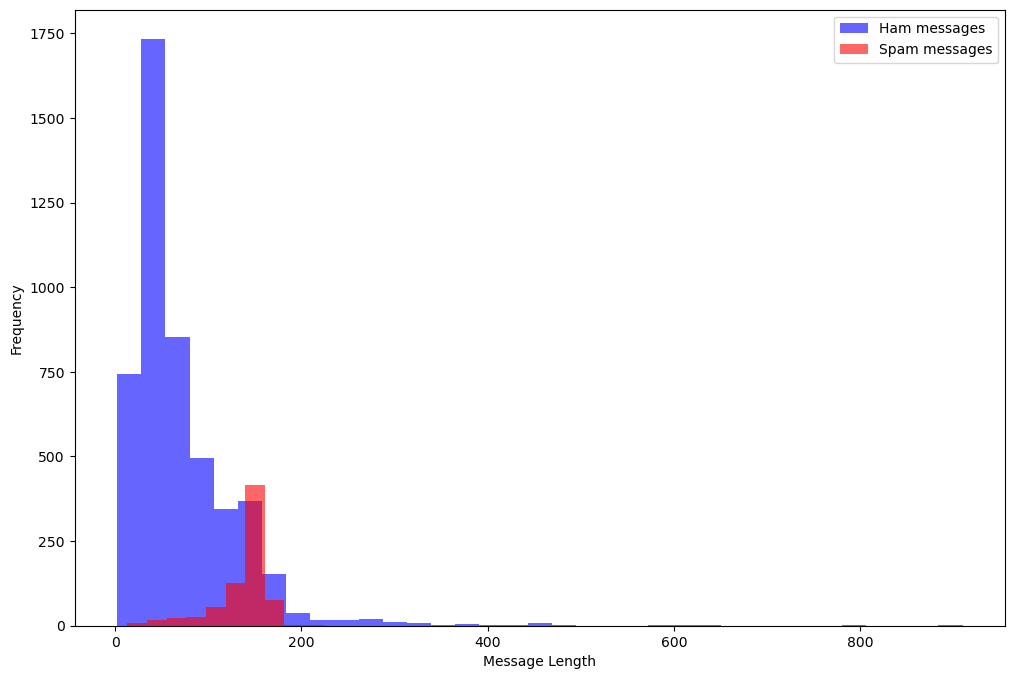

In [19]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [20]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [21]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [22]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return  ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [23]:
sms['clean_message'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [24]:
from collections import Counter

words = sms[sms.label=='ham'].clean_message.apply(lambda msg: [word.lower() for word in msg.split()])
ham_words = Counter()

for word in words:
    ham_words.update(word)
ham_words.most_common(10)

[('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('go', 247),
 ('ill', 236),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229),
 ('come', 224)]

In [25]:
from collections import Counter

words = sms[sms.label=='spam'].clean_message.apply(lambda msg: [word.lower() for word in msg.split()])
spam_words = Counter()

for word in words:
    spam_words.update(word)
spam_words.most_common(10)

[('call', 347),
 ('free', 216),
 ('txt', 150),
 ('mobile', 123),
 ('text', 120),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101),
 ('prize', 92),
 ('get', 83)]

In [67]:
from sklearn.model_selection import train_test_split

X = sms.clean_message
y = sms.label_num

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [68]:
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(x_train)

print(type(x_train_dtm), x_train_dtm.shape)

x_test_dtm = vect.transform(x_test)
print(type(x_test_dtm), x_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4457, 8265)
<class 'scipy.sparse._csr.csr_matrix'> (1115, 8265)


In [69]:
words = vect.get_feature_names_out()
for w in words:
    print(w)


008704050406
0089my
0121
01223585236
0125698789
02
020603
0207
02070836089
02072069400
02073162414
02085076972
020903
021
050703
0578
06
061104
07046744435
07090201529
07090298926
07099833605
071104
07123456789
0721072
07732584351
07734396839
07742676969
07753741225
0776xxxxxxx
07786200117
077xxx
07801543489
07808
07808247860
07808726822
07821230901
0789xxxxxxx
0794674629107880867867
0796xxxxxx
07973788240
07xxxxxxxxx
0800
08000407165
08000776320
08000839402
08000930705
08000938767
08001950382
08002888812
08002986030
08002986906
08006344447
0808
08081263000
08081560665
0825
0844
08448350055
08448714184
0845
08450542832
08452810071
08452810073
08452810075over18s
0870
08700621170150p
08701213186
08701417012
08701417012150p
0870141701216
08701752560
087018728737
0870241182716
08702490080
08702840625
08702840625comuk
08704439680
08704439680tscs
08706091795
0870737910216yrs
08707500020
08707509020
08707808226
08708034412
08708800282
08709222922
08709501522
0870k
087104711148
08712101358
087

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

tdif_transformer = TfidfTransformer()
tdif_transformer.fit(x_train_dtm)
x_train_tdif = tdif_transformer.transform(x_train_dtm)

In [71]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [72]:
%time nb.fit(x_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 2.17 ms


MultinomialNB()

In [73]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def display_metrics(y, y_pred):
    print(f"Точность: {accuracy_score(y, y_pred)}")
    print(f"f1: {f1_score(y, y_pred)}")
    print(f"recall_score: {recall_score(y, y_pred)}")
    print(f"precision_score: {precision_score(y, y_pred)}")

In [74]:
y_pred = nb.predict(x_test_dtm)
display_metrics(y_test, y_pred)

Точность: 0.9820627802690582
f1: 0.9300699300699301
recall_score: 0.8866666666666667
precision_score: 0.9779411764705882


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'NB': MultinomialNB(),
    'knn': KNeighborsClassifier(),
    'LogReg': LogisticRegression(),
}


for name, model in models.items():
    pipe = Pipeline([
        ('CountVector', CountVectorizer()),
        ('Tf_idf', TfidfTransformer()),
        ('clf', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    print(f'Модель: {name}')
    display_metrics(y_test, y_pred)
    print("<<<<<<<<<<<<<<<>>>>>>>>>>>>>>")

Модель: NB
Точность: 0.967713004484305
f1: 0.8636363636363636
recall_score: 0.76
precision_score: 1.0
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>
Модель: knn
Точность: 0.9139013452914798
f1: 0.5294117647058824
recall_score: 0.36
precision_score: 1.0
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>
Модель: LogReg
Точность: 0.9461883408071748
f1: 0.76
recall_score: 0.6333333333333333
precision_score: 0.95
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>
